In [ ]:
import numpy as np
import pandas as pd
import torch
import shutil 
from tqdm import tqdm
import os
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [10]:
data_root = '/home/jupyter/datasphere/project/project'
print(os.listdir(data_root))

['.ipynb_checkpoints', 'train']


# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫–∏.

In [15]:
import os
import shutil

# –ü—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
src_dir = '/home/jupyter/datasphere/project/images'

# –ü–∞–ø–∫–∏ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è train –∏ val
train_dir = '/home/jupyter/datasphere/project/smokers_die_young/train'
val_dir = '/home/jupyter/datasphere/project/smokers_die_young/val'

# –°–æ–∑–¥–∞–µ–º –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ train –∏ val –¥–ª—è –∫–ª–∞—Å—Å–æ–≤, –µ—Å–ª–∏ –æ–Ω–∏ –Ω–µ —Å—É—â–µ—Å—Ç–≤—É—é—Ç
for class_name in ['smoking', 'notsmoking']:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# –ü—Ä–æ—Ö–æ–¥ –ø–æ –ø–∞–ø–∫–∞–º smoking –∏ not smoking
for class_name in ['smoking', 'notsmoking']:
    class_path = os.path.join(src_dir, class_name)
    images = sorted(os.listdir(class_path))  # –°–æ—Ä—Ç–∏—Ä—É–µ–º –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è
    
    for idx, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        
        # –ü—Ä–æ–≤–µ—Ä–∫–∞, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Ç–µ–∫—É—â–∏–π —ç–ª–µ–º–µ–Ω—Ç —Ñ–∞–π–ª–æ–º
        if os.path.isfile(img_path):
            # –ö–∞–∂–¥—É—é –ø—è—Ç—É—é —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—é –∫–ª–∞–¥–µ–º –≤ –ø–∞–ø–∫—É val, –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤ train
            if (idx + 1) % 5 == 0:
                dest_dir = os.path.join(val_dir, class_name)
            else:
                dest_dir = os.path.join(train_dir, class_name)
            
            # –ö–æ–ø–∏—Ä—É–µ–º —Ñ–∞–π–ª
            shutil.copy(img_path, os.path.join(dest_dir, img_name))

print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∑–∞–≤–µ—Ä—à–µ–Ω–æ!")


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∑–∞–≤–µ—Ä—à–µ–Ω–æ!


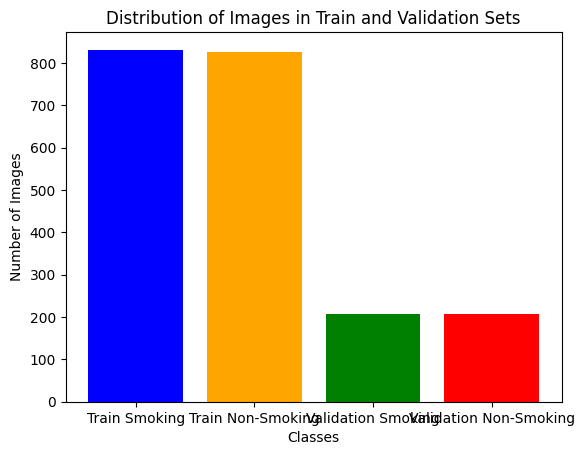

In [17]:
import matplotlib.pyplot as plt

def print_data():
    train_smoking = len(os.listdir('/home/jupyter/datasphere/project/smokers_die_young/train/smoking'))
    train_nonsmoking = len(os.listdir('/home/jupyter/datasphere/project/smokers_die_young/train/notsmoking'))
    val_smoking = len(os.listdir('/home/jupyter/datasphere/project/smokers_die_young/val/smoking'))
    val_nonsmoking = len(os.listdir('/home/jupyter/datasphere/project/smokers_die_young/val/notsmoking'))
    labels = ['Train Smoking', 'Train Non-Smoking', 'Validation Smoking', 'Validation Non-Smoking']
    values = [train_smoking, train_nonsmoking, val_smoking, val_nonsmoking]
    plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
    plt.title('Distribution of Images in Train and Validation Sets')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.show()
print_data()

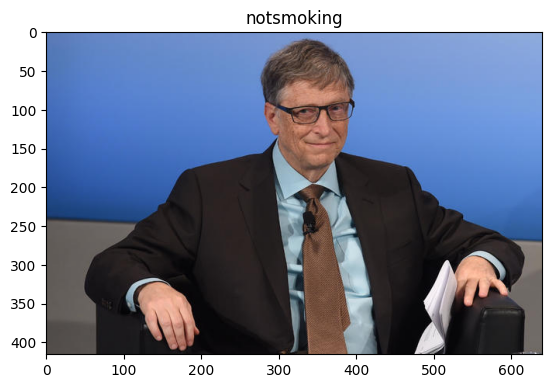

In [26]:
from PIL import Image
import random

def show_random_image(image_folder):
    image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]
    random_image_path = random.choice(image_paths)
    folder_name = os.path.basename(os.path.dirname(random_image_path))
    image = Image.open(random_image_path)
    plt.imshow(image)
    plt.title(folder_name)
    plt.show()
    plt.pause(0.001)
show_random_image('/home/jupyter/datasphere/project/smokers_die_young/val/notsmoking')

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞: –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è –∏ open source.

In [16]:
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision.transforms.functional import adjust_brightness
from PIL import Image
image_folders_train = ["/home/jupyter/datasphere/project/train/smoking", "/home/jupyter/datasphere/project/train/notsmoking"]

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫ open source –¥–∞—Ç–∞—Å–µ—Ç—É
train_transforms_data_all = [
    transforms.Compose([
        transforms.RandomRotation(60),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
        transforms.ToTensor(),
    ]),
    transforms.Compose([
        transforms.RandomGrayscale(p=1),
        transforms.RandomOrder([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
        ]),
        transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    transforms.Compose([
        transforms.RandomInvert(),
        transforms.ToTensor(),
]), 
     transforms.Compose([
        transforms.GaussianBlur(kernel_size=3),  # –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–≥–æ —Ä–∞–∑–º—ã—Ç–∏—è
        transforms.ToTensor(),
    ]),
]
#–ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫ –¥–∞—Ç–∞—Å–µ—Ç—É —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —è—Ä–∫–æ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
def reduce_brightness(image, factor):
    return adjust_brightness(image, factor)

train_transforms_dataset_source = [
    transforms.Compose([
        transforms.CenterCrop(1000),
        transforms.RandomGrayscale(p=1),
        transforms.ToTensor(),
    ]),
    transforms.Compose([
        transforms.CenterCrop(1000),
        transforms.Lambda(lambda x: reduce_brightness(x, 0.5)),  # –£–º–µ–Ω—å—à–µ–Ω–∏–µ —è—Ä–∫–æ—Å—Ç–∏ –Ω–∞ 0.5
        transforms.ToTensor(),
    ]),
    transforms.Compose([
        transforms.CenterCrop(100),
        transforms.Lambda(lambda x: reduce_brightness(x, 0.3)),  # –£–º–µ–Ω—å—à–µ–Ω–∏–µ —è—Ä–∫–æ—Å—Ç–∏ –Ω–∞ 0.3,
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]),
]

augment_number = 25

for image_folder in image_folders_train:
    for index_image, filename in enumerate(os.listdir(image_folder)):
        # –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—É—Ç–∏ –∫ —Ç–µ–∫—É—â–µ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é
        image_path = os.path.join(image_folder, filename)

        if not filename.startswith('data_') and index_image % augment_number == 0:
            # –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π
            for index, transform in enumerate(train_transforms_data_all):
                augmented_image = transform(Image.open(image_path))

                # –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–º–µ–Ω–∏ —Ñ–∞–π–ª–∞ –±–µ–∑ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è
                name, ext = os.path.splitext(filename)

                # –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–º–µ–Ω–∏ –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ñ–∞–π–ª–∞
                augmented_filename = f"{name}_{index}_augmented{ext}"

                # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
                output_path = os.path.join(image_folder, augmented_filename)
                save_image(augmented_image, output_path)
        elif filename.startswith('data_'):
            for index, transform in enumerate(train_transforms_dataset_source):
                augmented_image = transform(Image.open(image_path))

                name, ext = os.path.splitext(filename)

                augmented_filename = f"{name}_{index}_augmented{ext}"

                output_path = os.path.join(image_folder, augmented_filename)
                save_image(augmented_image, output_path)

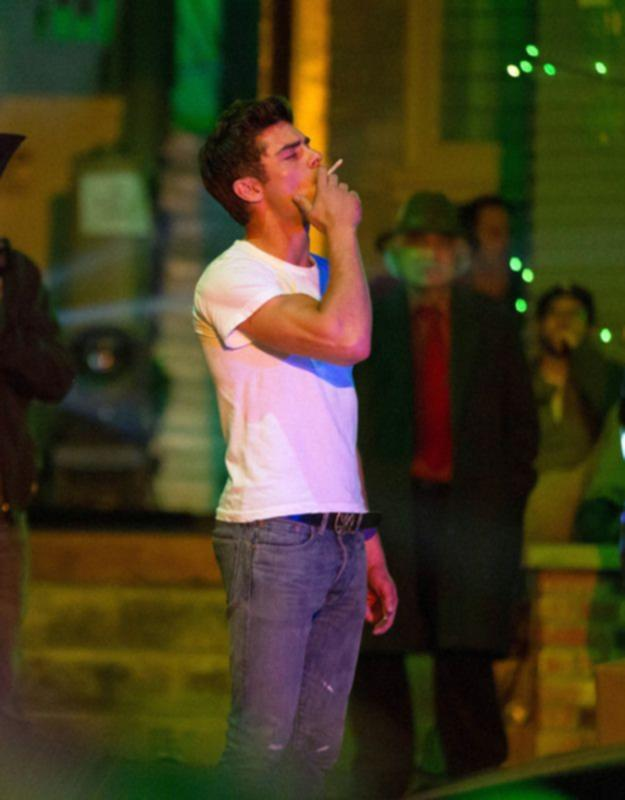

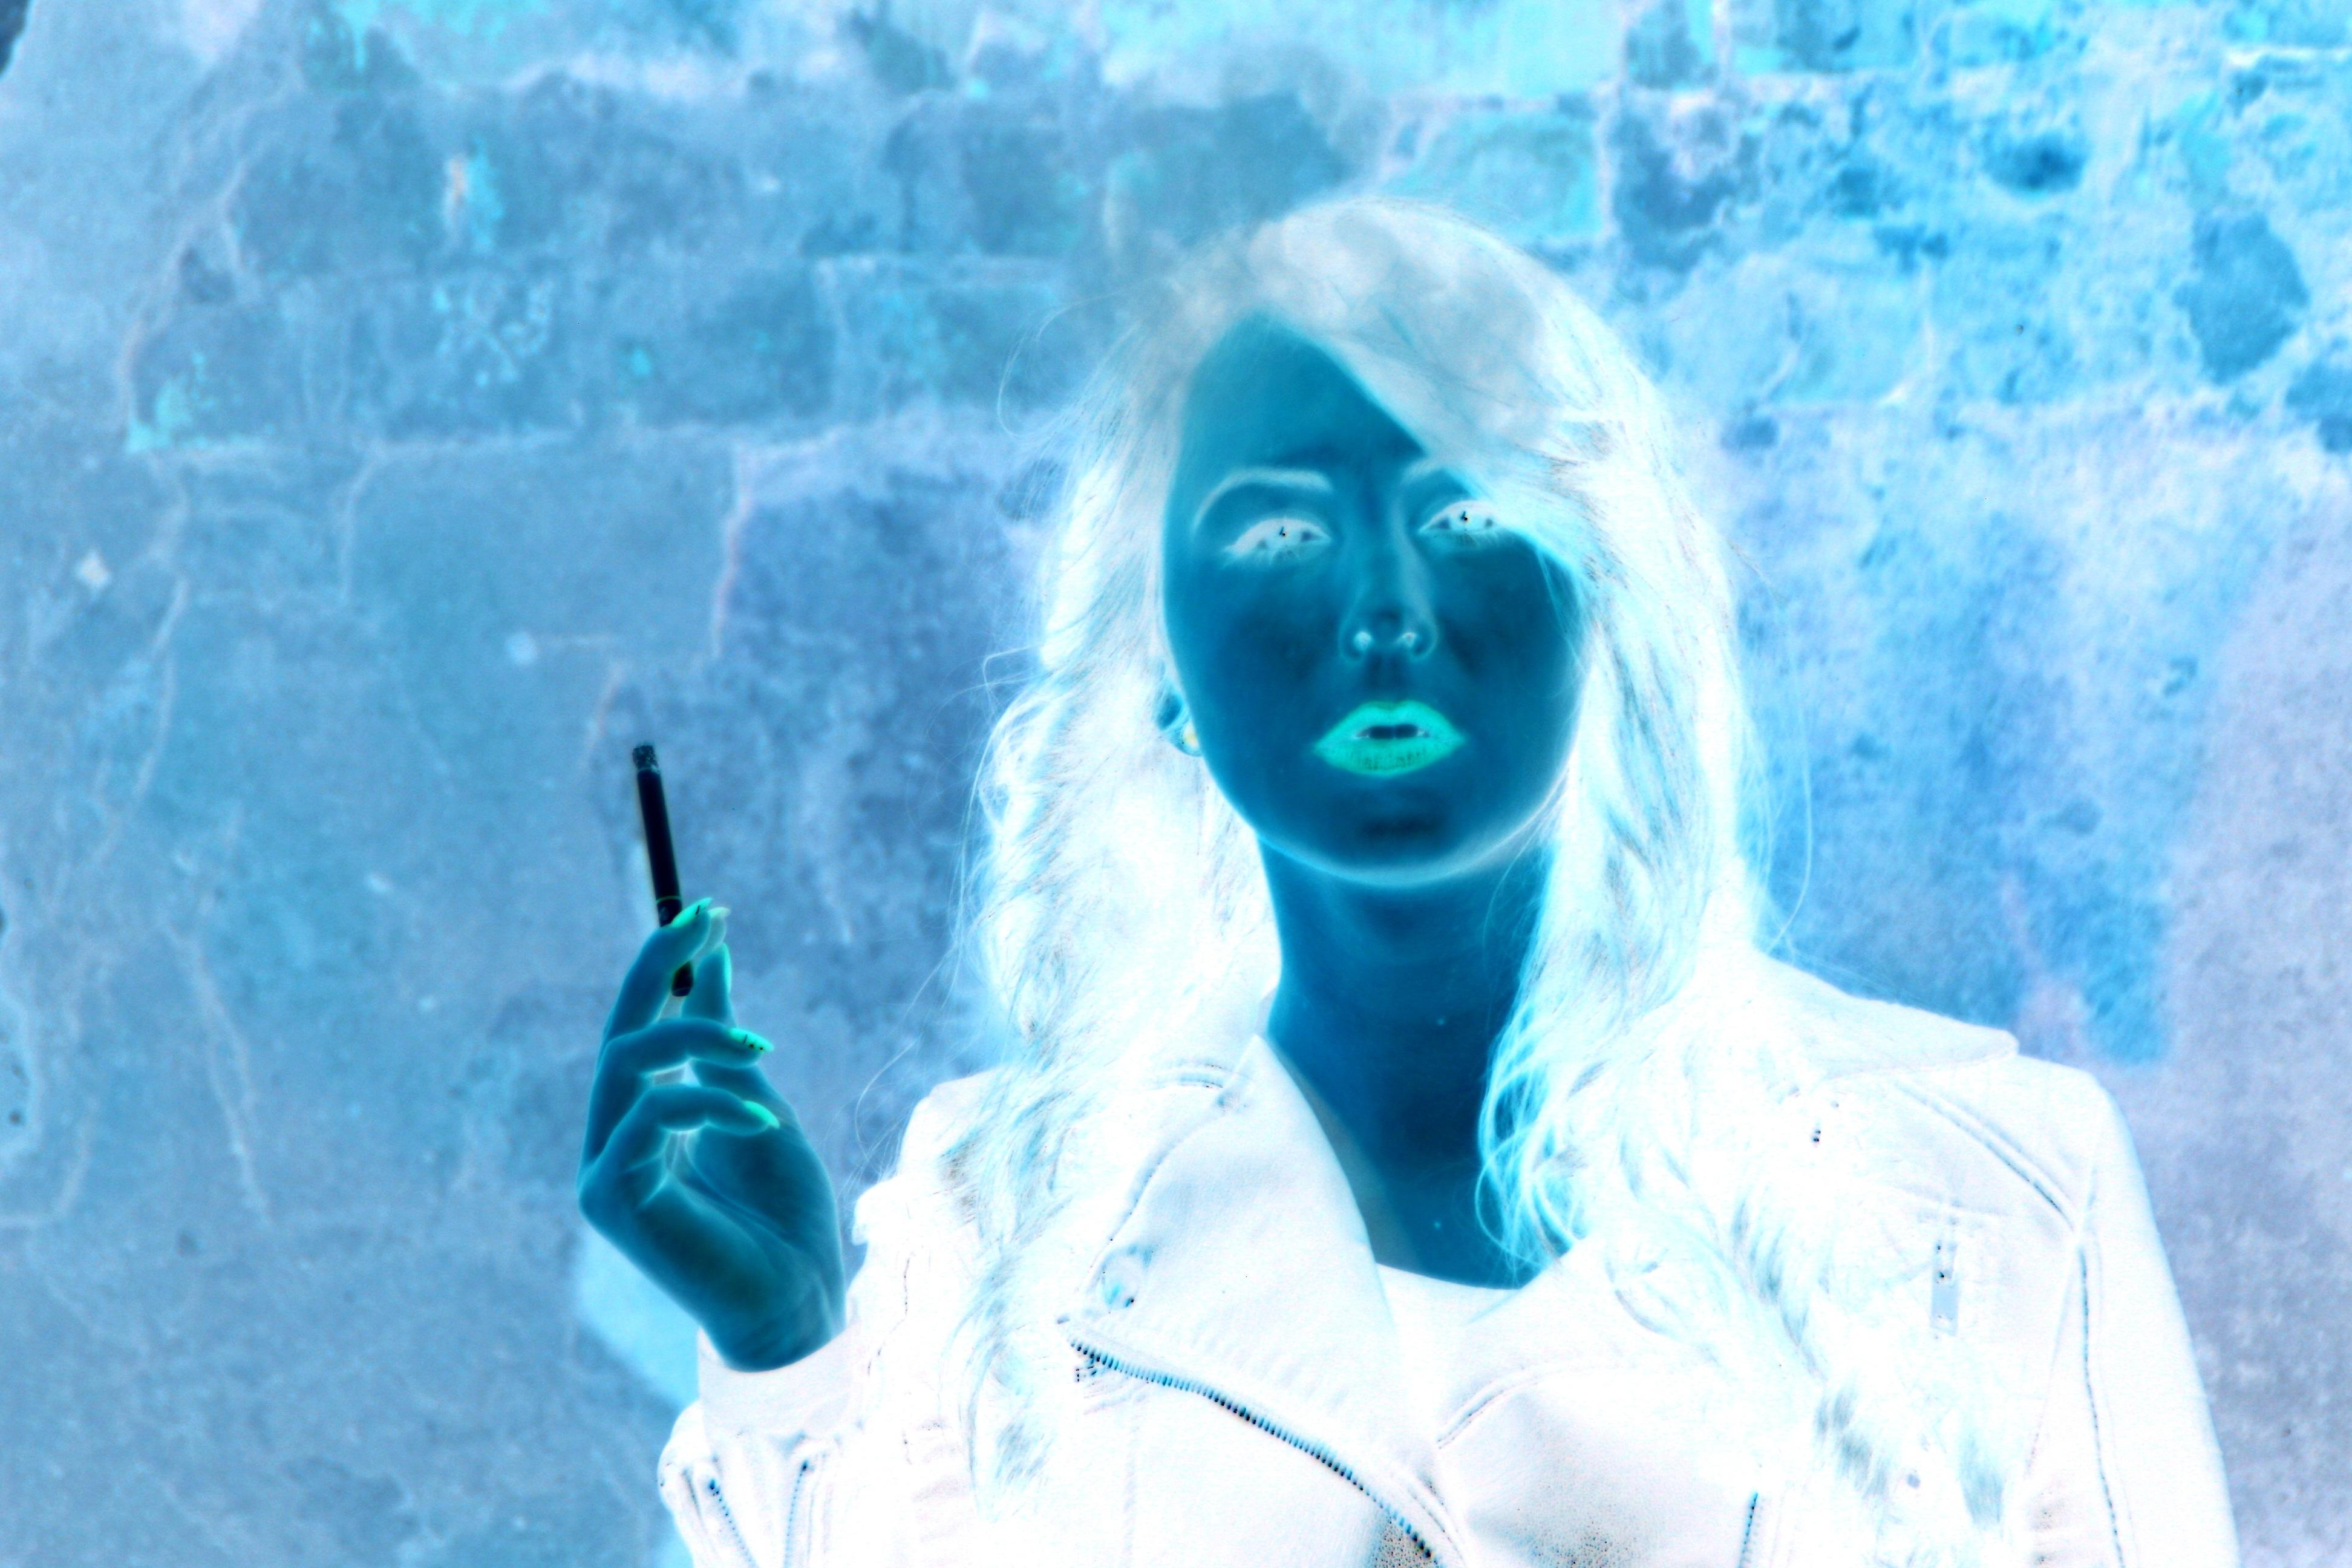

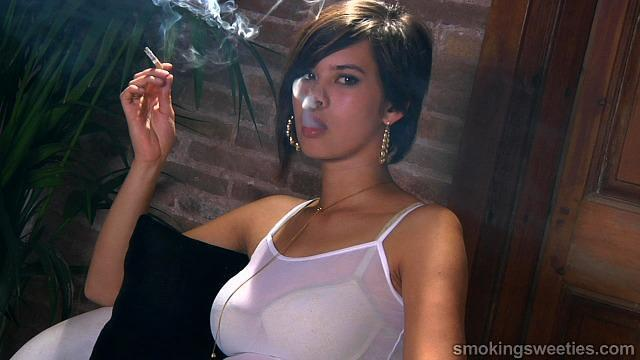

In [7]:
from IPython.display import display, Image
print_image = 3
total  = 0
image_folger = '/kaggle/working/train/smoking'
for filename in os.listdir(image_folger):
    if '_augmented' in filename:
        if total == print_image:
            break
        total+=1
        image_path = os.path.join(image_folger, filename)
        display(Image(filename=image_path, height=400))
        print("\n")

# –û–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏.

In [18]:
%pip -q install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.103 üöÄ Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon Processor (Icelake))
Setup complete ‚úÖ (4 CPUs, 31.3 GB RAM, 63.1/98.3 GB disk)


In [22]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [1]:
%pip -q install wandb


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
pip -q install ultralytics


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
from ultralytics import YOLO

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ YOLOv8 –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
model = YOLO('yolov8n-cls.pt')  # –ó–∞–≥—Ä—É–∑–∏—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å

# –ó–∞–ø—É—Å–∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏
model.train(data='/home/jupyter/datasphere/project/Images/images', epochs=10)

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ mlflow –¥–ª—è –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏

In [5]:
import mlflow

# –ó–∞–≤–µ—Ä—à–µ–Ω–∏–µ —Ç–µ–∫—É—â–µ–≥–æ –∑–∞–ø—É—Å–∫–∞, –µ—Å–ª–∏ –æ–Ω –∞–∫—Ç–∏–≤–µ–Ω
if mlflow.active_run() is not None:
    mlflow.end_run()


In [7]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
import logging

In [4]:
%pip -q install mlflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
# –ò–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π + —É—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ç—Ä–µ–∫–∏–Ω–≥–∞ –Ω–∞ –ø—É–±–ª–∏—á–Ω—ã–π ip –≤–∏—Ä—Ç—É–∞–ª–∫–∏
import mlflow
import warnings
warnings.filterwarnings("ignore")
mlflow.set_tracking_uri("http://89.169.154.235:8000/")
print(mlflow.get_tracking_uri())


http://89.169.154.235:8000/


In [5]:
mlflow.set_experiment("new_experiment_2")

<Experiment: artifact_location='s3://mlflow-bucket1/artifacts/5', creation_time=1727985295134, experiment_id='5', last_update_time=1727985295134, lifecycle_stage='active', name='new_experiment_2', tags={}>

In [8]:
import mlflow
from ultralytics import YOLO
import os

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–ª–æ–∂–µ–Ω–Ω–æ–π —Å–µ—Å—Å–∏–∏ MLflow
with mlflow.start_run() as run:
    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    mlflow.log_param("model", "yolov8l-cls.pt")
    mlflow.log_param("epochs", 5)

    # –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ YOLOv8 –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
    model = YOLO('yolov8l-cls.pt')  # –ó–∞–≥—Ä—É–∑–∏—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å

    # –ó–∞–ø—É—Å–∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ —Å –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –º–µ—Ç—Ä–∏–∫
    results = model.train(data='/home/jupyter/datasphere/project/smokers_die_young', epochs=5)
    print(results)
    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
    mlflow.log_metric("accuracy", results.top1)
    mlflow.log_metric("fitness", results.top5)

    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ (—Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤–µ—Å–æ–≤)
    # –¢–µ–∫—É—â–∏–π –ø—É—Ç—å –∫ 'best.pt'
    best_weights_path = os.path.join(results.save_dir, 'weights/best.pt')

# –î–æ–±–∞–≤–ª—è–µ–º –≤ –Ω–∞—á–∞–ª–æ '/home/jupyter/datasphere/project'
    full_best_weights_path = os.path.join('/home/jupyter/datasphere/project', best_weights_path)
    mlflow.log_artifact(full_best_weights_path)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71.7M/71.7M [00:04<00:00, 17.7MB/s]


Ultralytics 8.3.4 üöÄ Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon Processor (Icelake))
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/home/jupyter/datasphere/project/smokers_die_young, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train31, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /home/jupyter/work/resources/smokers_die_young/train... 1655 images, 2 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1655/1655 [00:00<?, ?it/s]

train: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/train/notsmoking/251.jpg: corrupt JPEG restored and saved
train: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/train/notsmoking/754.jpg: corrupt JPEG restored and saved
train: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/train/notsmoking/811.jpg: corrupt JPEG restored and saved
train: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/train/notsmoking/911.jpg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'webp', 'tif', 'jpg', 'jpeg', 'png', 'tiff', 'pfm', 'dng', 'mpo', 'bmp'}
videos: {'gif', 'm4v', 'asf', 'mov', 'mp4', 'wmv', 'webm', 'avi', 'mkv', 'mpg', 'ts', 'mpeg'}
train: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/train/smoking/214.jpg: corrupt JPEG restored and saved
train: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/train/smoking/23.jpg: corrupt JPEG restored and saved
train: WARNING ‚ö†Ô∏è 


val: Scanning /home/jupyter/work/resources/smokers_die_young/val... 412 images, 1 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 412/412 [00:00<?, ?it/s]

val: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/val/notsmoking/351.jpg: corrupt JPEG restored and saved
val: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/val/notsmoking/44.jpg: corrupt JPEG restored and saved
val: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/val/notsmoking/814.jpg: corrupt JPEG restored and saved
val: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/val/smoking/16.jpg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'webp', 'tif', 'jpg', 'jpeg', 'png', 'tiff', 'pfm', 'dng', 'mpo', 'bmp'}
videos: {'gif', 'm4v', 'asf', 'mov', 'mp4', 'wmv', 'webm', 'avi', 'mkv', 'mpg', 'ts', 'mpeg'}
val: WARNING ‚ö†Ô∏è /home/jupyter/work/resources/smokers_die_young/val/smoking/231.jpg: corrupt JPEG restored and saved
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0

TensorBoard: model graph visualization added ‚úÖ
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train31
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:47<00:00,  3.67s/it]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:47<00:00,  3.67s/it]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:47<00:00,  3.68s/it]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:47<00:00,  3.66s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:47<00:00,  3.69s/it]

                   all      0.951          1



5 epochs completed in 0.865 hours.
Optimizer stripped from runs/classify/train31/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/train31/weights/best.pt, 72.6MB

Validating runs/classify/train31/weights/best.pt...
Ultralytics 8.3.4 üöÄ Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon Processor (Icelake))
YOLOv8l-cls summary (fused): 133 layers, 36,187,138 parameters, 0 gradients, 98.7 GFLOPs
train: /home/jupyter/work/resources/smokers_die_young/train... found 1657 images in 2 classes ‚úÖ 
val: /home/jupyter/work/resources/smokers_die_young/val... found 413 images in 2 classes ‚úÖ 
test: None...


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:47<00:00,  3.65s/it]


                   all      0.951          1
Speed: 0.0ms preprocess, 87.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train31
Results saved to runs/classify/train31


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ‚ñÉ‚ñá‚ñà‚ñÖ‚ñÅ
wandb:                  lr/pg1 ‚ñÉ‚ñá‚ñà‚ñÖ‚ñÅ
wandb:                  lr/pg2 ‚ñÉ‚ñá‚ñà‚ñÖ‚ñÅ
wandb:   metrics/accuracy_top1 ‚ñÅ‚ñÖ‚ñÖ‚ñÜ‚ñà
wandb:   metrics/accuracy_top5 ‚ñÅ‚ñÅ‚ñÅ‚ñÅ‚ñÅ
wandb:            model/GFLOPs ‚ñÅ
wandb:        model/parameters ‚ñÅ
wandb: model/speed_PyTorch(ms) ‚ñÅ
wandb:              train/loss ‚ñà‚ñÉ‚ñÇ‚ñÅ‚ñÅ
wandb:                val/loss ‚ñà‚ñÑ‚ñÑ‚ñÉ‚ñÅ
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 0.00015
wandb:                  lr/pg1 0.00015
wandb:                  lr/pg2 0.00015
wandb:   metrics/accuracy_top1 0.95146
wandb:   metrics/accuracy_top5 1
wandb:            model/GFLOPs 99.125
wandb:        model/parameters 36202306
wandb: model/speed_PyTorch(ms) 88.657
wandb:              train/loss 0.13448
wandb:                val/loss 0.36734
wandb: 
wandb: üöÄ View run train30 at:

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f54b0746bf0>
curves: []
curves_results: []
fitness: 0.9757281541824341
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9514563083648682, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9757281541824341}
save_dir: PosixPath('runs/classify/train31')
speed: {'preprocess': 0.0005526450073834761, 'inference': 87.28345389505036, 'loss': 7.349310569392824e-05, 'postprocess': 6.654887523465943e-05}
task: 'classify'
top1: 0.9514563083648682
top5: 1.0


2024/10/03 21:01:46 INFO mlflow.tracking._tracking_service.client: üèÉ View run amazing-stag-529 at: http://89.169.154.235:8000/#/experiments/5/runs/bcfb0e222274421381bd9fa5018274cd.
2024/10/03 21:01:46 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: http://89.169.154.235:8000/#/experiments/5.


## Predict –Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–π —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏

In [30]:
from ultralytics import YOLO

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –≤–µ—Å–∞–º–∏
model = YOLO('/home/jupyter/datasphere/project/runs/classify/train/weights/best.pt')  # –ó–∞–≥—Ä—É–∑–∏—Ç—å –º–æ–¥–µ–ª—å —Å –ª—É—á—à–∏–º–∏ –≤–µ—Å–∞–º–∏

# –ü—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
test_data = '/home/jupyter/datasphere/project/f9e727b0-c3e7-4658-b50a-22d70e113a92.jpeg'

# –ó–∞–ø—É—Å–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
save_dir = '/home/jupyter/datasphere/project'

# –ó–∞–ø—É—Å–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
results = model.predict(source=test_data, save=True, save_dir=save_dir)

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
for result in results:
    print(result)


image 1/1 /home/jupyter/datasphere/project/f9e727b0-c3e7-4658-b50a-22d70e113a92.jpeg: 224x224 smoking 0.90, notsmoking 0.10, 10.3ms
Speed: 4.6ms preprocess, 10.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'notsmoking', 1: 'smoking'}
obb: None
orig_img: array([[[177, 190, 192],
        [242, 255, 255],
        [233, 246, 248],
        ...,
        [230, 214, 202],
        [228, 213, 204],
        [228, 213, 204]],

       [[177, 190, 192],
        [242, 255, 255],
        [233, 246, 248],
        ...,
        [230, 214, 202],
        [230, 214, 202],
        [230, 214, 202]],

       [[176, 189, 191],
        [241, 254, 255],
        [233, 246, 248],
        ...,
        [233, 214, 201],
        [233, 214, 201],
        [235, 213, 201]],

       ...,

       [[ 95,  65, 214],
        [129,  97, 255],
        [104, 

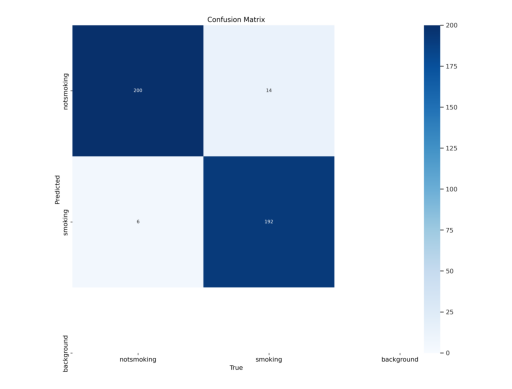

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# –û—Ç–∫—Ä—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
image = Image.open('/home/jupyter/datasphere/project/runs/classify/train31/confusion_matrix.png')

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ Jupyter Notebook
plt.imshow(image)
plt.axis('off')  # –û—Ç–∫–ª—é—á–∞–µ–º –æ—Å–∏
plt.show()


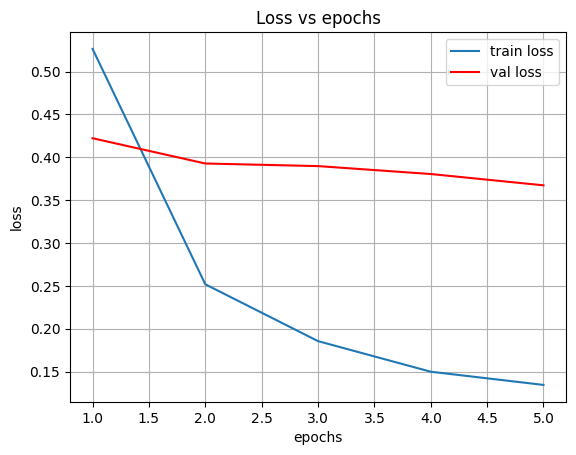

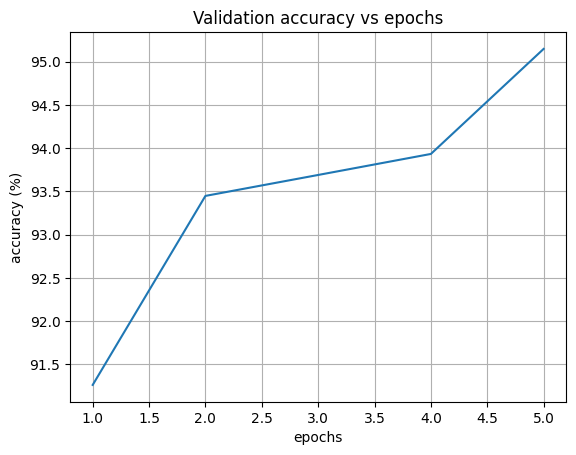

In [16]:
import pandas as pd

results_path = '/home/jupyter/datasphere/project/runs/classify/train31/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

# –î–µ—Ç–µ–∫—Ü–∏—è —á–µ–ª–æ–≤–µ–∫–∞.

In [19]:
%pip install -q --no-warn-script-location git+https://github.com/Deci-AI/super-gradients.git@stable


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 17.0.0 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [20]:
import pathlib
from super_gradients.training import models
from super_gradients.common.object_names import Models

[2024-10-03 21:35:20] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /home/jupyter/sg_logs/console.log


[2024-10-03 21:35:28] INFO - env_sanity_check.py - Library check is not supported when super_gradients installed through "git+https://github.com/..." command


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose")
model.to(device)

[2024-10-03 21:42:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


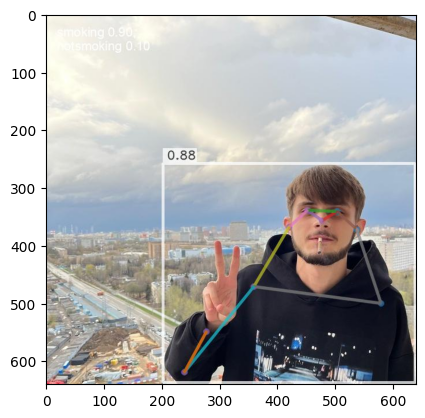

In [33]:
output = model.predict('/home/jupyter/datasphere/project/runs/classify/predict/f9e727b0-c3e7-4658-b50a-22d70e113a92.jpeg', conf=confidence)

# –°–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ–º
output.save('/home/jupyter/datasphere/pred_pose/output_image.jpg') 

# –û—Ç–∫—Ä—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
image = Image.open('/home/jupyter/datasphere/pred_pose/output_image.jpg')

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é matplotlib
plt.imshow(image)